In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_dir = os.listdir(r"C:\Users\shriv\OneDrive\Desktop\train")
test_dir = os.listdir(r"C:\Users\shriv\OneDrive\Desktop\test")
valid_dir = os.listdir(r"C:\Users\shriv\OneDrive\Desktop\valid")

In [3]:
train_dir

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [4]:
test_dir

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [5]:
valid_dir

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [7]:
import os
# Open a file
path = r"C:\Users\shriv\OneDrive\Desktop\train"
dirs = os.listdir( path )
# This would print all the files and directories
for file in dirs:
    print(file)

Crazing
Inclusion
Patches
Pitted
Rolled
Scratches


In [8]:
for i in train_dir:
    tr = r"C:\Users\shriv\OneDrive\Desktop\train\{}".format(i)
print("Training Inclusion data:",len(os.listdir(tr)))

Training Inclusion data: 276


In [9]:
for i in test_dir:
    te = r"C:\Users\shriv\OneDrive\Desktop\test\{}".format(i)
print("Training Inclusion data:",len(os.listdir(te)))

Training Inclusion data: 12


In [10]:
for i in valid_dir:
    vld = r"C:\Users\shriv\OneDrive\Desktop\valid\{}".format(i)
print("Training Inclusion data:",len(os.listdir(vld)))

Training Inclusion data: 12


In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
tr_dr = r"C:\Users\shriv\OneDrive\Desktop\train"
# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
tr_dr,
target_size=(200, 200),
batch_size=10,
class_mode='categorical')
# Flow validation images in batches of 10 using test_datagen generator
vl_dr = r"C:\Users\shriv\OneDrive\Desktop\valid"
validation_generator = test_datagen.flow_from_directory(
vl_dr,
target_size=(200, 200),
batch_size=10,
class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [15]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [16]:
#train the model
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 31s 183ms/step - loss: 1.7787 - accuracy: 0.3068 - val_loss: 1.6089 - val_accuracy: 0.2500
Epoch 2/20
166/166 [==============================] - 29s 176ms/step - loss: 1.2454 - accuracy: 0.5248 - val_loss: 0.9173 - val_accuracy: 0.7083
Epoch 3/20
166/166 [==============================] - 29s 175ms/step - loss: 0.9212 - accuracy: 0.6709 - val_loss: 0.8038 - val_accuracy: 0.6667
Epoch 4/20
166/166 [==============================] - 30s 180ms/step - loss: 0.7446 - accuracy: 0.7639 - val_loss: 0.3059 - val_accuracy: 0.8889
Epoch 5/20
166/166 [==============================] - 29s 172ms/step - loss: 0.6308 - accuracy: 0.7965 - val_loss: 0.4929 - val_accuracy: 0.8611
Epoch 6/20
166/166 [==============================] - 29s 175ms/step - loss: 0.5288 - accuracy: 0.8225 - val_loss: 0.5414 - val_accuracy: 0.9028
Epoch 7/20
166/166 [==============================] - 29s 173ms/step - loss: 0.4351 - accuracy: 0.8629 - val_loss: 0.1195 - val_ac

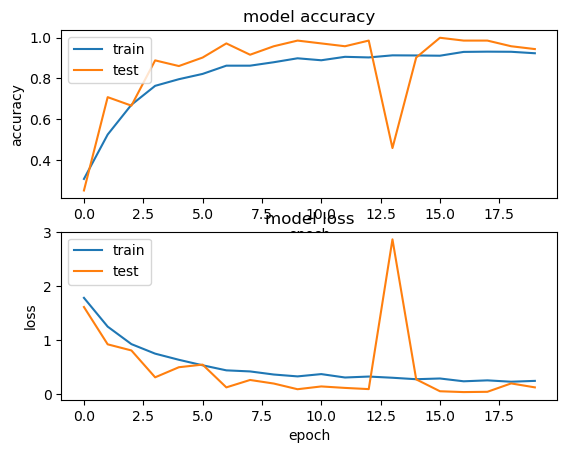

In [17]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [19]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir = r'C:\Users\shriv\OneDrive\Desktop\test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [20]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [21]:
from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test,no_of_classes)

In [24]:
# We just have the file names in the x set. Let's load the images and convert them
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
# Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array
x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [25]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 0s 48ms/step


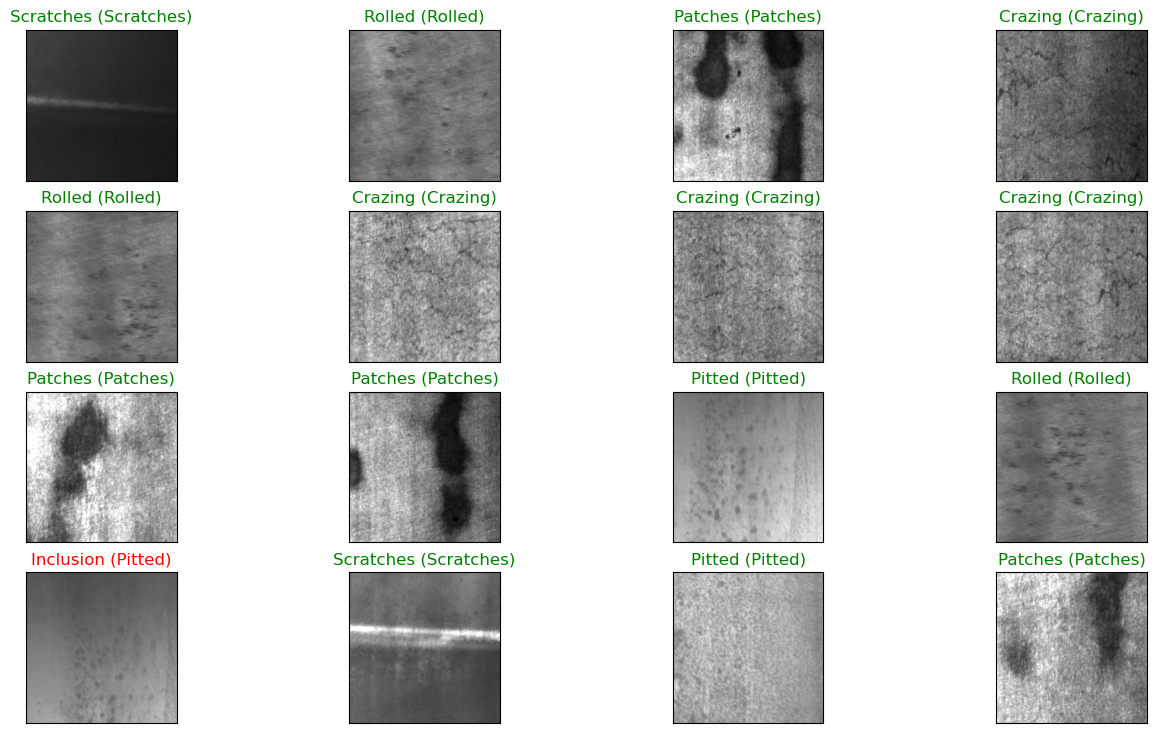

In [27]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
#Green results in correct prediction 
#Red results in wrong prediction
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))